In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Откроем файл с данными и сохраним в переменные
data = pd.read_excel (r'C:\Users\spawn\Downloads\data.xlsx')

In [4]:
#Посмотрим на общие данные датасета
display(data.info())
display(data.head(10)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


None

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-07-07 00:00:00
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-07-15 00:00:00
7,21.0,3613.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-10-13 00:00:00
8,23.0,8511.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-06-08 00:00:00
9,24.0,16347.7,ОПЛАЧЕНО,Андреев,новая,NaN,оригинал,2021-06-23 00:00:00


Перед нами датасет, где представлены данные по поступлению денежных средств от клиентов компании N за покупку ее услуг.

При первом знакомстве с данными мы видим:

- датасет состоит из 730 строк;
- данные в формате object и float.

Перед началом исследований необходимо проверит датасет на пропуски и изменить тип данных в столбцах. 

### Проверим датасет на пропуски

In [5]:
#Выведу количество пропущенных значений для всех столбцов
data.isna().sum()

client_id           6
sum                 6
status              0
sale                6
new/current         6
Unnamed: 5        730
document           21
receiving_date    123
dtype: int64

In [6]:
#Отдельно - значения NaN
data.loc[data['client_id'].isnull()]

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,Июнь 2021,NaN,NaN,NaN,NaN,NaN
258,NaN,NaN,Июль 2021,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,Август 2021,NaN,NaN,NaN,NaN,NaN
484,NaN,NaN,Сентябрь 2021,NaN,NaN,NaN,NaN,NaN
594,NaN,NaN,Октябрь 2021,NaN,NaN,NaN,NaN,NaN


В столбце status пропусков нет, возможно значение заполняется автоматически при создании новой записи.  
Столбец Unnamed: 5 пуст, его можно удалить без вреда.  
Пропуски в столбцах client_id, sum, sale, new/current обозначают начало данных за определенный месяц. Такие пропуски оставлю, чтобы использовать для срезов по месяцам.   
Пропуски в столбце receiving_date нормальны, так как дата проставляется только при получении оригинала договора.

In [7]:
#Проверю на дубликаты
print(data.duplicated().sum())
data[data.duplicated(keep=False)]

33


,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
18,43.0,1961.2,ОПЛАЧЕНО,Селиванов,текущая,NaN,оригинал,2021-07-27 00:00:00
19,43.0,1961.2,ОПЛАЧЕНО,Селиванов,текущая,NaN,оригинал,2021-07-27 00:00:00
51,95.0,4688.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-05-18 00:00:00
52,96.0,1266.2,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-07-16 00:00:00
53,96.0,1266.2,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-07-16 00:00:00
...,...,...,...,...,...,...,...,...
647,364.0,31078.7,ОПЛАЧЕНО,Михайлов,новая,NaN,НЕТ,NaN
648,364.0,31078.7,ОПЛАЧЕНО,Михайлов,новая,NaN,НЕТ,NaN
679,204.0,1006.2,ОПЛАЧЕНО,Андреев,текущая,NaN,НЕТ,NaN
680,204.0,1006.2,ОПЛАЧЕНО,Андреев,текущая,NaN,НЕТ,NaN


Дубли есть, но так как я не знаю точную специфику заполнения и работы, решила не удалять.

In [8]:
#Удалю пустой столдец Unnamed: 5
data.drop('Unnamed: 5', axis= 1 , inplace= True)
data

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00


### Типы данных

In [9]:
#для удобного отображения даты, изменю тип данных столбца receiving_date
data['receiving_date'] = pd.to_datetime(data['receiving_date'],errors='coerce', format='%Y-%m')

In [10]:
#Создам столбец с номером месяца даты получения оригиналов документов
data['receiving_month'] = data['receiving_date'].dt.month

По данных в файле видно, что все сведения за 2021г. Табличного разделения поступлений денежных средств по месяцам нет, поэтому необходимо будет использовать срезы по индексам строк, где указаны наименования месяцев.

### Задания

Создаю столбец с номером месяца сделки

In [11]:
data['month'] = '0'

In [12]:
data.loc[2:128, 'month'] = 5

In [13]:
data.loc[2:128, 'month'] = 5

In [14]:
data.loc[130:257, 'month'] = 6

In [15]:
data.loc[259:368, 'month'] = 7

In [16]:
data.loc[370:483, 'month'] = 8

In [17]:
data.loc[485:593, 'month'] = 9

In [18]:
data.loc[595:, 'month'] = 10

**Вопрос 1.**
Вычислить общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [19]:
#Срез по июльским сделкам
task_one = data.loc[259:368]
task_one

,client_id,sum,status,sale,new/current,document,receiving_date,receiving_month,month
259,15.0,13838.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09,8.0,7
260,16.0,1586.5,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09,8.0,7
261,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,НЕТ,NaT,NaN,7
262,21.0,4313.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-09-17,9.0,7
263,24.0,19407.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-08-19,8.0,7
...,...,...,...,...,...,...,...,...,...
364,277.0,4878.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-03,8.0,7
365,281.0,11703.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-08-13,8.0,7
366,284.0,1977.7,ПРОСРОЧЕНО,Филимонова,текущая,НЕТ,NaT,NaN,7
367,286.0,4048.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-11,8.0,7


In [20]:
round(data.query('(status != "ПРОСРОЧЕНО") & (month == 7)')['sum'].sum(),2)

859896.47

Общая выручка за июль 2021 по тем сделкам, приход денежных средств которых не просрочен - 859 896,47.

**Вопрос 2.** Как изменялась выручка компании за рассматриваемый период?

In [21]:
df = data.groupby('month')['sum'].sum()
df = df[:6]
df

month
5      797878.49
6      810266.11
7      861874.17
8      850435.79
9      820383.78
10    1033148.39
Name: sum, dtype: float64

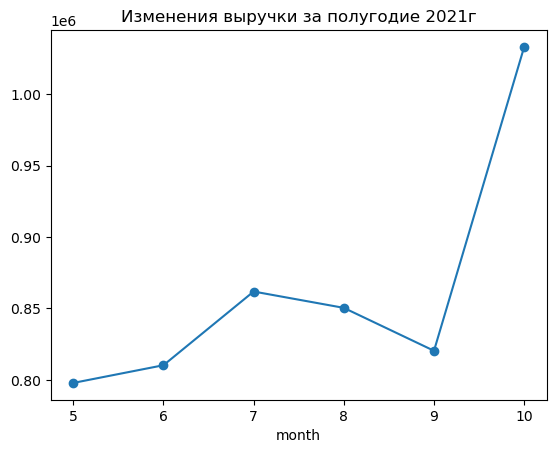

In [22]:
plot = df.plot(title="Изменения выручки за полугодие 2021г", style='o-')

По графику мы видим схожие показатели в мае и июне, рост в июле, но постепенное падение в августе и сентябре, а после рост в октябре.

**Вопрос 3.** Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021? 

In [23]:
data.query('month == 9').groupby('sale')['sum'].sum().sort_values(ascending=False)

sale
Смирнов       221525.70
Петрова       149344.46
Андреев       133652.50
Иванов         94770.60
Кузнецова      72228.40
Филимонова     59514.47
Васильев       49895.45
Соколов        35183.50
Михайлов        4268.70
Name: sum, dtype: float64

Менеджер Смирнов привлек больше всего (221 525,70) денежных средств в сентябре 2021.

**Вопрос 4.** Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

<AxesSubplot:ylabel='client_id'>

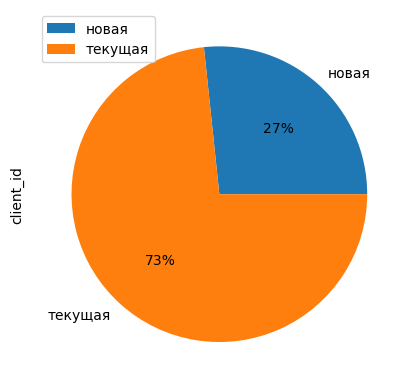

In [24]:
data.query('month == 10').groupby(['new/current']).count().plot(kind='pie', y='client_id', autopct='%1.0f%%')

За октябрь сделок в статусе "текущая" больше (73%), чем сделок в статусе "новая".

**Вопрос 5.** Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [25]:
data.query('(month == 5)&(receiving_month == 6)')['client_id'].count()

77

77 оригиналов договоров было получено в июне по майским сделкам.

### Задание

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).  
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце). 

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [26]:
#Сразу возьмем срез сделок, по которым документы были получены не позже 1 июля 2021
data_bonus = data.query('receiving_month < 7')
data_bonus

,client_id,sum,status,sale,new/current,document,receiving_date,receiving_month,month
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,6.0,5
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,6.0,5
8,23.0,8511.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-06-08,6.0,5
9,24.0,16347.7,ОПЛАЧЕНО,Андреев,новая,оригинал,2021-06-23,6.0,5
10,28.0,10537.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-06-16,6.0,5
...,...,...,...,...,...,...,...,...,...
122,273.0,10133.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-06-01,6.0,5
123,274.0,26033.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-06-22,6.0,5
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31,5.0,5
128,287.0,6368.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-06-29,6.0,5


In [27]:
#Функция расчета бонусов
def bonus(row):
    coef_max = 0.07
    coef_middle =0.05
    coef_low = 0.03
    if ((row['new/current']=='новая') and (row['status'] == 'ОПЛАЧЕНО')):
        return round(row['sum'] * coef_max,2)
    
    if(row['new/current']=='текущая'):
        if((row.status != 'ПРОСРОЧЕНО')):
            if(row['sum'] < 10000):
                return round(row['sum']*coef_low,2)
            else:
                return round(row['sum']*coef_middle,2)
    return 0

In [28]:
data_bonus['bonus'] = data_bonus.apply(bonus,axis=1)

C:\Users\spawn\AppData\Local\Temp\ipykernel_11696\1523962341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bonus['bonus'] = data_bonus.apply(bonus,axis=1)


In [29]:
data_bonus

,client_id,sum,status,sale,new/current,document,receiving_date,receiving_month,month,bonus
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,6.0,5,699.59
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,6.0,5,21.59
8,23.0,8511.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-06-08,6.0,5,255.35
9,24.0,16347.7,ОПЛАЧЕНО,Андреев,новая,оригинал,2021-06-23,6.0,5,1144.34
10,28.0,10537.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-06-16,6.0,5,526.89
...,...,...,...,...,...,...,...,...,...,...
122,273.0,10133.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-06-01,6.0,5,506.69
123,274.0,26033.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-06-22,6.0,5,1301.69
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31,5.0,5,103.61
128,287.0,6368.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-06-29,6.0,5,191.06


In [30]:
#Срез по сделкам где бонус был выплачен в след. месяц
data_bonus.query('(receiving_month != month) & (receiving_month >= month)')

,client_id,sum,status,sale,new/current,document,receiving_date,receiving_month,month,bonus
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,6.0,5,699.59
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,6.0,5,21.59
8,23.0,8511.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-06-08,6.0,5,255.35
9,24.0,16347.7,ОПЛАЧЕНО,Андреев,новая,оригинал,2021-06-23,6.0,5,1144.34
10,28.0,10537.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-06-16,6.0,5,526.89
...,...,...,...,...,...,...,...,...,...,...
120,266.0,3363.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-06-23,6.0,5,100.91
121,270.0,5288.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-06-07,6.0,5,158.66
122,273.0,10133.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-06-01,6.0,5,506.69
123,274.0,26033.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-06-22,6.0,5,1301.69


In [31]:
#Остаток вознаграждения для каждого менеджера
display(data_bonus.groupby('sale')['bonus'].sum())

sale
Андреев       4798.21
Васильев       339.23
Иванов        2503.85
Кузнецова     2604.68
Петрова       7028.80
Селиванов      353.32
Смирнов       4775.15
Филимонова     409.68
Name: bonus, dtype: float64